# Maersk ML Assignment Challenge

In this challenge we are given a time-series dataset and we are asked to come up with ML models to predict the "Sourcing Cost" for various entries of products. We have been given an xlsx file containing the instructions for the task, the training set and the test set.


# Solution Summary

The solution to the challenge is divided into the following sections:
- Data Preprocessing: Since the dataset was in the xlsx format, the dataset was converted to csv format for both the training and test set.
- Exploratory Data Analysis: The training set was explored to get a better understanding of the dataset. Following analysis was conducted to know more about the dataset:
    - Basic Exploration: The rows and columns of the dataset were explored. It was noted that there were no null values in the dataset.
    - Data Distribution: An analysis was conducted to evaluate how many unique values were present in each column.
    - Exploring 'Sourcing Cost' (the target variable) Column: It was noted that the 'Sourcing Cost' column had negative values in the training dataset.
    - Temporal Analysis of Mean Training Sourcing Cost: The Mean Training Sourcing Cost was highest in the month of March and lowest in the month of November,
- Data Cleaning: This involved the following steps:
    - Exploration of Negative Values in 'Sourcing Cost' Column: The unique combinations of the first six dataset columns that had negative 'Sourcing Cost' was extracted and the distribution was plotted.
    - Imputation of Negative Values in 'Sourcing Cost' Column: The negative values in the 'Sourcing Cost' column were imputed using the mean of the positive 'Sourcing Cost' values for the unique combinations mentioned above.
- Feature Engineering: The following steps were performed on both the train and the test set:
    - Feature Extraction: The 'Date' column was split into 'Year', 'Month' and 'Day' columns.
    - Feature Encoding: The categorical columns were encoded using the LabelEncoder.
    - Metric: Mean Squared Error was used as the metric to evaluate the models.
    - Time Series Split: The Time Series Split was used to split the training set into training and validation set.
    - Cross Validation: The training set was split into 5 folds for cross validation.
- Model Training and Evaluation: The following ML models were trained and evaluated on the MSE metric:
    - GradientBoostingRegressor
    - XGBoost Regressor
    - LightGBM Regressor
- It was found that XGBoost Regressor Model performed the best on the test set.


# Data Preprocessing

The data preprocessing step involves the following steps:
- Downloading the xlsx file
- Reading the xlsx file using pandas
- Saving the training part of the xlsx sheet as a csv file with filename train.csv
- Saving the test part of the xlsx sheet as a csv file with filename test.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
training_data = pd.read_excel('forecast.xlsx', sheet_name='Training Dataset')
training_data.to_csv('train.csv', index=False)
test_data = pd.read_excel('forecast.xlsx', sheet_name='Test Dataset')
test_data.to_csv('test.csv', index=False)

# Exploratory Data Analysis

## Basic Exploration

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763


In [4]:
train_df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [5]:
len(train_df)

550176

In [6]:
train_df.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [7]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-21,169.42


In [8]:
test_df.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [9]:
len(test_df)

96

In [10]:
test_df.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

We observe that:
- The training set has 5,55,176 rows and 8 columns
- These columns are named as follows:
    - `ProductType`
    - `Manufacturer`
    - `Area Code`
    - `Sourcing Channel`
    - `Product Size`
    - `Product Type`
    - `Month of Sourcing`
    - `Sourcing Cost`
- There are no null values in the training set
- The test set has 96 rows and 8 columns
- The columns are the same as those in the training set
- There are no null values in the test set

## Data Distribution

In [11]:
eight_cols_list = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost']


In [12]:
# Train Set
for col in eight_cols_list:
    print(f"For the training set, {col} has {train_df[col].nunique()} unique values")
    print(f"These unique values are {train_df[col].unique()}")


For the training set, ProductType has 3 unique values
These unique values are ['NTM3' 'NTM2' 'NTM1']
For the training set, Manufacturer has 3 unique values
These unique values are ['X1' 'X2' 'X3']
For the training set, Area Code has 45 unique values
These unique values are ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
For the training set, Sourcing Channel has 4 unique values
These unique values are ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
For the training set, Product Size has 3 unique values
These unique values are ['Large' 'Small' 'ExtraLarge']
For the training set, Product Type has 2 unique values
These unique values are ['Powder' 'Liquid']
For the training set, Month of Sourcing has 11 unique values
These unique values are ['2021-05-01' '2020-10-01' '2020-12-01' '202

In [13]:
# Test Set
for col in eight_cols_list:
    print(f"For the test set, {col} has {test_df[col].nunique()} unique values")
    print(f"These unique values are {test_df[col].unique()}")

For the test set, ProductType has 3 unique values
These unique values are ['NTM1' 'NTM2' 'NTM3']
For the test set, Manufacturer has 3 unique values
These unique values are ['X1' 'X2' 'X3']
For the test set, Area Code has 45 unique values
These unique values are ['A1' 'A10' 'A11' 'A2' 'A28' 'A29' 'A3' 'A33' 'A34' 'A4' 'A6' 'A7' 'A8'
 'A9' 'A12' 'A21' 'A30' 'A31' 'A39' 'A40' 'A42' 'A43' 'A44' 'A45' 'A46'
 'A16' 'A17' 'A19' 'A23' 'A26' 'A32' 'A36' 'A37' 'A38' 'A41' 'A5' 'A25'
 'A13' 'A14' 'A15' 'A18' 'A24' 'A35' 'A20' 'A22']
For the test set, Sourcing Channel has 4 unique values
These unique values are ['DIRECT' 'ECOM' 'RETAIL' 'WHOLESALE']
For the test set, Product Size has 3 unique values
These unique values are ['Small' 'Large' 'ExtraLarge']
For the test set, Product Type has 2 unique values
These unique values are ['Powder' 'Liquid']
For the test set, Month of Sourcing has 1 unique values
These unique values are ['2021-06-21']
For the test set, Sourcing Cost has 95 unique values
These

In [14]:
# Check if unqiue values in train set are in test set for the first 6 columns
six_cols_list = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
for col in six_cols_list:
    if set(train_df[col].unique()).issubset(set(test_df[col].unique())):
        print(f"The unique values in {col} in the train set are also in the test set")

The unique values in ProductType in the train set are also in the test set
The unique values in Manufacturer in the train set are also in the test set
The unique values in Area Code in the train set are also in the test set
The unique values in Sourcing Channel in the train set are also in the test set
The unique values in Product Size in the train set are also in the test set
The unique values in Product Type in the train set are also in the test set


In [15]:
# Check how many duplicates are there in the Sourcing Cost column in the training set
train_df['Sourcing Cost'].duplicated().sum()

543489

We observe that:
- For the first six columns, the number of unique values in the train set are in the test set
- The Souring Cost in the training set has 6687 unique values with 543489 entries duplicated

## Exploring the Target Variable: Sourcing Cost

In [16]:
sourcing_cost_column = 'Sourcing Cost'

In [17]:
summary_stats = train_df[sourcing_cost_column].describe()
print("Summary Statistics for 'Sourcing Cost' Training Data:")
print(summary_stats)

Summary Statistics for 'Sourcing Cost' Training Data:
count    550176.000000
mean        108.816793
std         104.390097
min        -196.070000
25%          57.000000
50%         132.000000
75%         146.147000
max       32632.500000
Name: Sourcing Cost, dtype: float64


In [18]:
summary_stats = test_df[sourcing_cost_column].describe()
print("Summary Statistics for 'Sourcing Cost' Test Data:")
print(summary_stats)

Summary Statistics for 'Sourcing Cost' Test Data:
count     96.000000
mean     106.208021
std       52.359484
min        4.140000
25%       59.662500
50%      117.245000
75%      144.915000
max      234.710000
Name: Sourcing Cost, dtype: float64


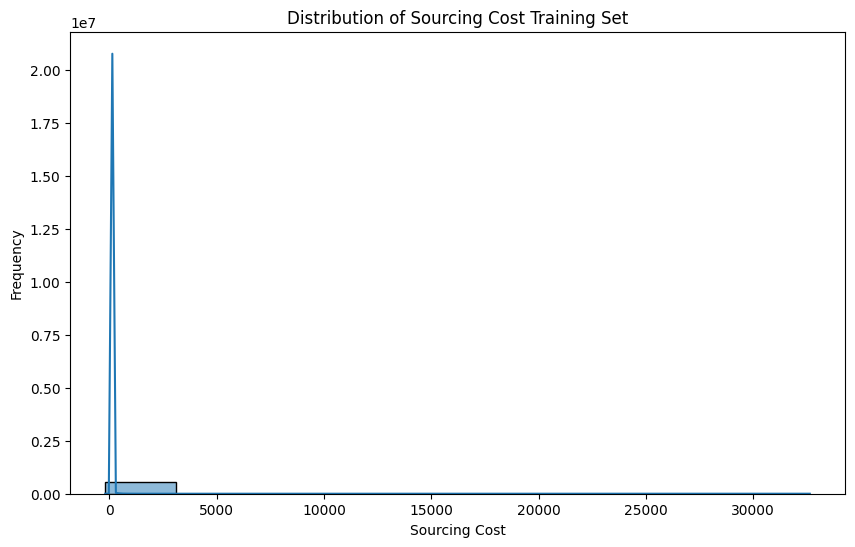

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df[sourcing_cost_column], bins=10, kde=True)
plt.title(f'Distribution of {sourcing_cost_column} Training Set')
plt.xlabel(sourcing_cost_column)
plt.ylabel('Frequency')
plt.show()

We observe that:
- There are negative values in the Training Sourcing Cost column
- The mean of the Train Sourcing Cost is 108 but the maximum is 32632
- There are no negative values in the Test Sourcing Cost column

## Temporal Analysis of Mean Training Sourcing Cost over the Months

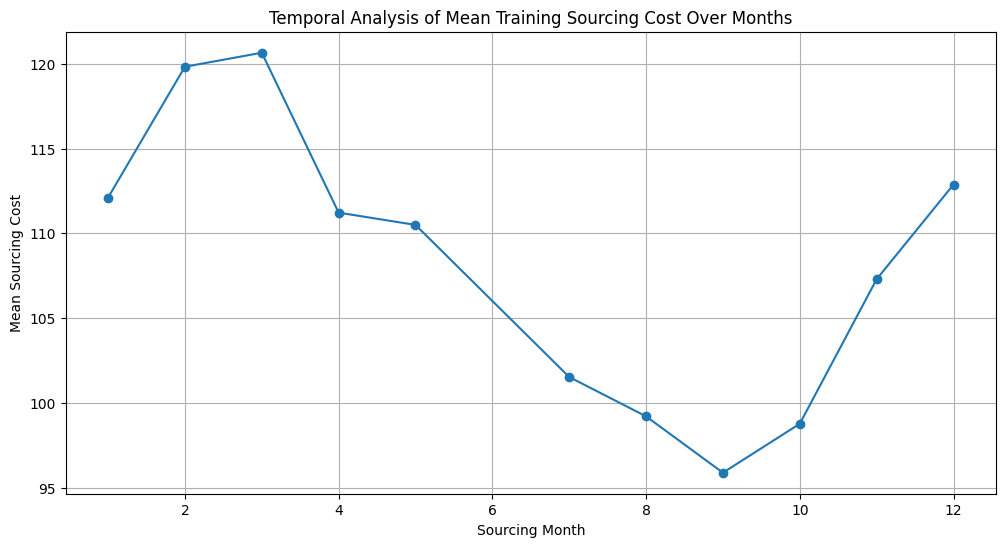

In [20]:
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'])

train_df['Sourcing Month'] = train_df['Month of Sourcing'].dt.month
train_df['Sourcing Day'] = train_df['Month of Sourcing'].dt.day
train_df['Sourcing Year'] = train_df['Month of Sourcing'].dt.year

monthly_sourcing = train_df.groupby('Sourcing Month')[sourcing_cost_column].mean()
plt.figure(figsize=(12, 6))
monthly_sourcing.plot(marker='o')
plt.title('Temporal Analysis of Mean Training Sourcing Cost Over Months')
plt.xlabel('Sourcing Month')
plt.ylabel('Mean Sourcing Cost')
plt.grid(True)
plt.show()


We observe that:
- The Sourcing Cost is highest in the month of March
- The Sourcing Cost is lowest in the month of November

## Exploration of Negative Values in the Training Sourcing Cost Column

We evaluate the unique combinations of the first six columns for which the Sourcing Cost is negative.

In [21]:
grouped_df = train_df.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']).agg({'Sourcing Cost': list}).reset_index()
grouped_df['Has Negative Cost'] = grouped_df['Sourcing Cost'].apply(lambda x: any(cost < 0 for cost in x))
combinations_with_negative_cost = grouped_df[grouped_df['Has Negative Cost']]
combinations_with_negative_cost.head(17)



,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Has Negative Cost
26,NTM1,X2,A31,DIRECT,Large,Liquid,"[0.0, -0.0010000000000116, -0.0009999999999994...",True
32,NTM1,X2,A44,DIRECT,Large,Liquid,"[29.257, 0.0, 21.559, 11.649, 133.122, 10.016,...",True
39,NTM2,X1,A16,DIRECT,Small,Powder,"[224.175, 98.37, 96.161, 97.089, 96.839, 104.1...",True
41,NTM2,X1,A19,DIRECT,Large,Powder,"[105.589, 109.492, 105.589, 179.003, 108.599, ...",True
53,NTM2,X1,A32,RETAIL,Small,Powder,"[127.68, 64.761, 65.405, -3.0253577421035504e-...",True
54,NTM2,X1,A36,DIRECT,Small,Powder,"[186.62, 162.278, 186.62, 186.62, 186.62, 186....",True
57,NTM2,X1,A38,DIRECT,Small,Powder,"[169.231, 200.0, 200.0, 200.0, 201.49, 201.491...",True
72,NTM2,X2,A25,DIRECT,Small,Powder,"[6.773, 6.773, 64.324, 7.683, 64.33, 128.709, ...",True
73,NTM2,X2,A31,DIRECT,Large,Powder,"[0.037, -0.0010000000000001, 0.0, -1.262878690...",True
74,NTM2,X2,A32,RETAIL,Small,Powder,"[63.838, 63.839, 63.834, 4.14945855453652e-15,...",True


In [22]:
negative_combinations_cost_stats = pd.DataFrame(columns=['Total Sourcing Cost Entries', 'Negative Sourcing Cost Entries'])
for idx, row in combinations_with_negative_cost.iterrows():
    total_entries = len(row['Sourcing Cost'])
    negative_entries = len([cost for cost in row['Sourcing Cost'] if cost < 0])
    negative_combinations_cost_stats.loc[idx] = [total_entries, negative_entries]
negative_combinations_cost_stats.head(17)

,Total Sourcing Cost Entries,Negative Sourcing Cost Entries
26,1479,320
32,2054,70
39,15938,98
41,3839,41
53,143,1
54,4843,1
57,2684,3
72,3785,12
73,16900,470
74,5147,153


We look at some of the distributions of the Sourcing Cost for 5 these combinations.

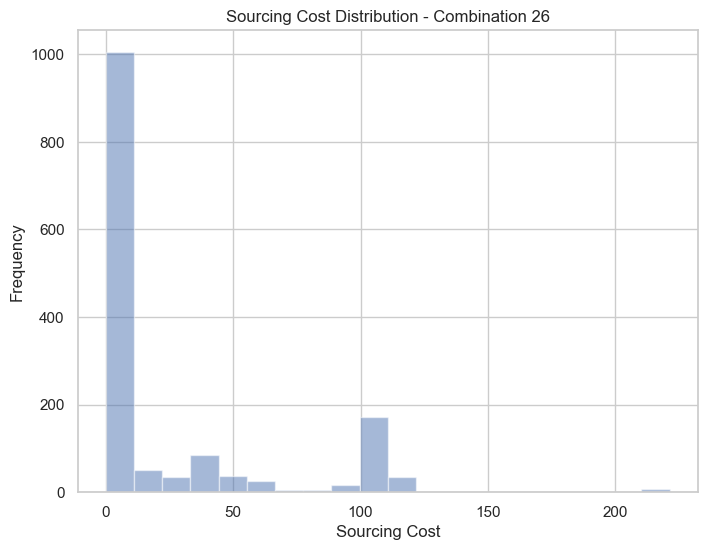

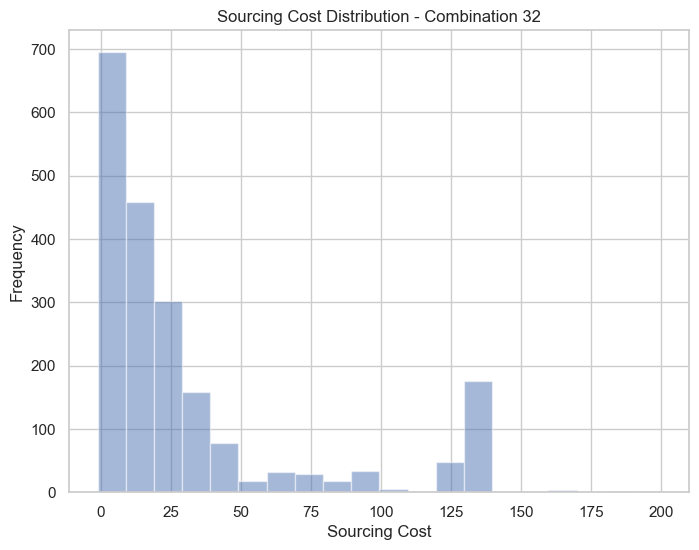

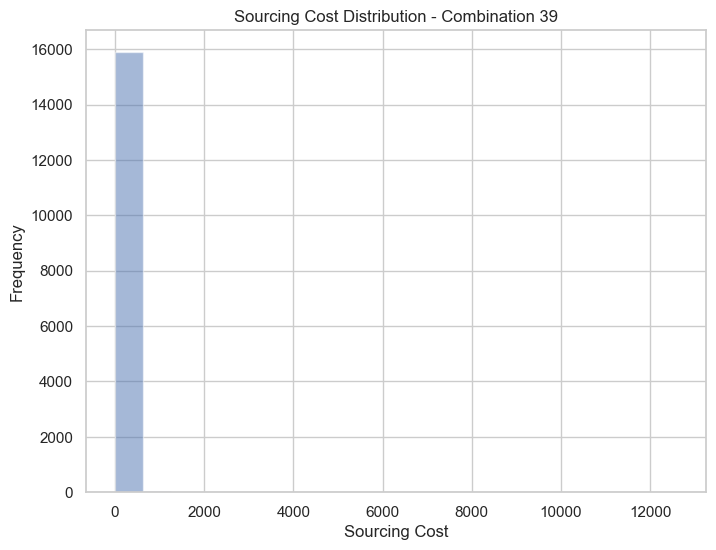

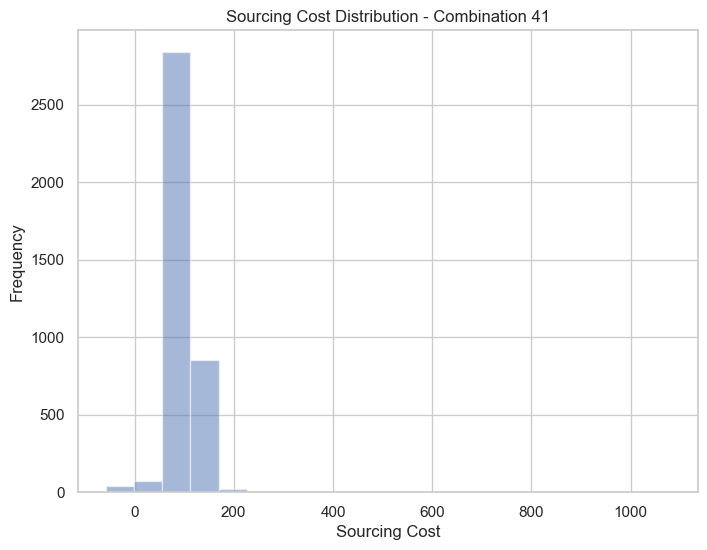

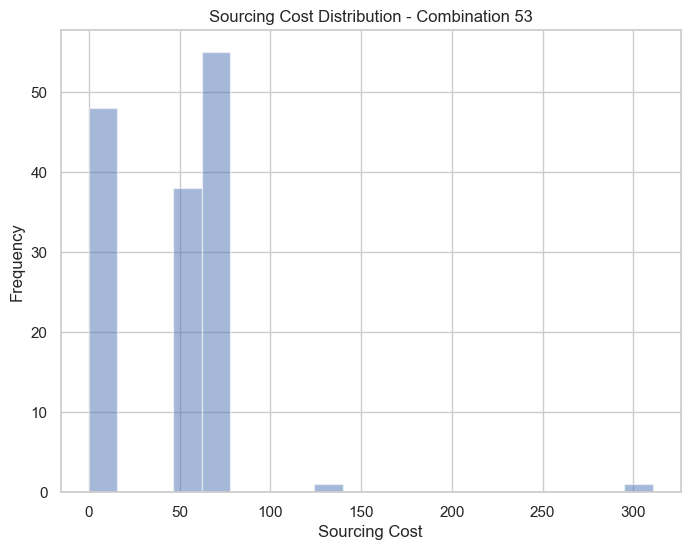

In [23]:
# Assuming 'Sourcing Cost' is the column containing lists of sourcing costs
sns.set(style="whitegrid")

# Choose some combinations to plot (adjust as needed)
combinations_to_plot = combinations_with_negative_cost.head(5)

# Plot Sourcing Cost distributions for each combination
for index, row in combinations_to_plot.iterrows():
    plt.figure(figsize=(8, 6))
    plt.hist(row['Sourcing Cost'], bins=20, alpha=0.5)
    plt.title(f'Sourcing Cost Distribution - Combination {index}')
    plt.xlabel('Sourcing Cost')
    plt.ylabel('Frequency')
    plt.show()

We observe that:
- There's no discernible pattern in the distribution of the Sourcing Cost for these combinations
- Since throwing away rose that have negative sourcing cost would meaning losing a lot of data, we decide to keep them but impute them with the mean of the First 6 Columns Unique Combination Sourcing Cost
- A better idea would be to use domain knowledge of the dataset to impute these values

### Impute Negative Values with Mean of the First 6 Columns Combination for Train Sourcing Cost

In [24]:
imputed_sourcing_cost_dict = {}
for index, row in combinations_with_negative_cost.iterrows():
    combination_key = tuple(row[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']])
    sourcing_cost_values = [value for value in row['Sourcing Cost'] if value >= 0]
    imputed_cost = sum(sourcing_cost_values) / len(sourcing_cost_values) if sourcing_cost_values else 0
    imputed_sourcing_cost_dict[combination_key] = imputed_cost
print(imputed_sourcing_cost_dict)

{('NTM1', 'X2', 'A31', 'DIRECT', 'Large', 'Liquid'): 29.899209663502997, ('NTM1', 'X2', 'A44', 'DIRECT', 'Large', 'Liquid'): 32.56112449596777, ('NTM2', 'X1', 'A16', 'DIRECT', 'Small', 'Powder'): 111.80889103535205, ('NTM2', 'X1', 'A19', 'DIRECT', 'Large', 'Powder'): 109.4181561348073, ('NTM2', 'X1', 'A32', 'RETAIL', 'Small', 'Powder'): 43.3030492957747, ('NTM2', 'X1', 'A36', 'DIRECT', 'Small', 'Powder'): 181.85987567120634, ('NTM2', 'X1', 'A38', 'DIRECT', 'Small', 'Powder'): 211.0623606863093, ('NTM2', 'X2', 'A25', 'DIRECT', 'Small', 'Powder'): 73.76873257354868, ('NTM2', 'X2', 'A31', 'DIRECT', 'Large', 'Powder'): 64.77152574558897, ('NTM2', 'X2', 'A32', 'RETAIL', 'Small', 'Powder'): 38.03888846615988, ('NTM2', 'X2', 'A44', 'RETAIL', 'Large', 'Powder'): 49.926624963247015, ('NTM3', 'X1', 'A13', 'DIRECT', 'Large', 'Powder'): 36.02528743705285, ('NTM3', 'X1', 'A14', 'DIRECT', 'Large', 'Liquid'): 17.503016225546535, ('NTM3', 'X1', 'A15', 'DIRECT', 'Large', 'Powder'): 39.91615310394972, (

In [25]:
for index, row in train_df.iterrows():
    combination_key = tuple(row[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']])
    if row['Sourcing Cost'] < 0:
        train_df.loc[index, 'Sourcing Cost'] = imputed_sourcing_cost_dict[combination_key]

In [26]:
print(len(train_df[train_df['Sourcing Cost'] < 0]))
summary_stats = train_df['Sourcing Cost'].describe()

0


## Feature Engineering

We do the following steps for feature engineering:
- 

We complete the following steps for feature engineering:
- We create separate columns for day, month and year from the Month of Sourcing column for both the training and test sets
- We label encode the categorical columns for both the training and test sets
- We choose the following columns as features for our model:
    - `ProductType`
    - `Manufacturer`
    - `Area Code`
    - `Sourcing Channel`
    - `Product Size`
    - `Product Type`
    - `Sourcing Month`
    - `Source Day`
    - `Source Year`
- We choose the following column as the target for our model:
    - `Sourcing Cost`
- We use LabelEncoder from sklearn to label encode the categorical columns
- We sort the rows in the training dataset by the Year, Month and Date
- We split the training dataset into training and validation sets using time series splitting
- We use the metric mean squared error to evaluate our model

In [27]:
# Note that sourcing month, day and year are already extracted for the training dataset
# We drop the Month of Sourcing column from the training dataset

train_df.drop('Month of Sourcing', axis=1, inplace=True)
test_df['Month of Sourcing'] = pd.to_datetime(test_df['Month of Sourcing'])
test_df['Sourcing Month'] = test_df['Month of Sourcing'].dt.month
test_df['Sourcing Day'] = test_df['Month of Sourcing'].dt.day
test_df['Sourcing Year'] = test_df['Month of Sourcing'].dt.year
test_df.drop('Month of Sourcing', axis=1, inplace=True)

In [28]:
full_df = pd.concat([train_df, test_df])

In [29]:
# Label Encode the categorical columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

full_df['ProductType'] = label_encoder.fit_transform(full_df['ProductType'])
full_df['Manufacturer'] = label_encoder.fit_transform(full_df['Manufacturer'])
full_df['Area Code'] = label_encoder.fit_transform(full_df['Area Code'])
full_df['Sourcing Channel'] = label_encoder.fit_transform(full_df['Sourcing Channel'])
full_df['Product Size'] = label_encoder.fit_transform(full_df['Product Size'])
full_df['Product Type'] = label_encoder.fit_transform(full_df['Product Type'])


train_df = full_df.iloc[:len(train_df)]
test_df = full_df.iloc[len(test_df):]

In [30]:
# Sort the training dataset by Sourcing Year, Sourcing Month and Sourcing Day
train_df = train_df.sort_values(by=['Sourcing Year', 'Sourcing Month', 'Sourcing Day'])

In [31]:
# Define features and target variable for training set and test set
X = train_df.drop('Sourcing Cost', axis=1)
y = train_df['Sourcing Cost']

X_test = test_df.drop('Sourcing Cost', axis=1)
y_test = test_df['Sourcing Cost']


In [32]:
# Choose Time Series Split

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

In [33]:
# Choose Metric 

from sklearn.metrics import mean_squared_error

In [34]:
# Model Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=120, max_depth=5, learning_rate=0.05, random_state=42)
gbr_mse_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    gbr_model.fit(X_train, y_train)
    y_pred = gbr_model.predict(X_val)
    mae = mean_squared_error(y_val, y_pred)
    print(f"MSE for validation set: {mae}")
    gbr_mse_scores.append(mae)

print("Mean MSE:", sum(gbr_mse_scores) / len(gbr_mse_scores))
gbr_model.fit(X, y)
test_gbr_predicitions = gbr_model.predict(X_test)
test_gbr_mse = mean_squared_error(y_test, test_gbr_predicitions)
print(f"Test MSE: {test_gbr_mse}")

MSE for validation set: 32097.83493757294
MSE for validation set: 7458.715921592887
MSE for validation set: 5741.198708669268
MSE for validation set: 7803.039715488434
MSE for validation set: 4928.033053525736
Mean MSE: 11605.764467369854
Test MSE: 8071.475667512645


In [35]:
# Model XGBoost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=105, learning_rate=0.05, max_depth=6, random_state=42)
xgb_mse_scores = []

# Perform time-series cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_val)
    mae = mean_squared_error(y_val, y_pred)
    print(f"MSE for validation set: {mae}")
    xgb_mse_scores.append(mae)

print("Mean MSE:", sum(xgb_mse_scores) / len(xgb_mse_scores))
xgb_model.fit(X, y)
test_xgb_predicitions = xgb_model.predict(X_test)
test_xgb_mse = mean_squared_error(y_test, test_xgb_predicitions)
print(f"Test MSE: {test_xgb_mse}")

MSE for validation set: 30088.724046670075
MSE for validation set: 4986.111990876618
MSE for validation set: 5911.976521530689
MSE for validation set: 7526.961779618522
MSE for validation set: 17504.345526306795
Mean MSE: 13203.623973000538
Test MSE: 7617.948283549891


In [36]:
# Model LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=105, num_leaves=31, learning_rate=0.025, max_depth=6, random_state=42)
lgb_mse_scores = []

# Perform time-series cross-validation
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_val)
    mae = mean_squared_error(y_val, y_pred)
    print(f"MSE for validation set: {mae}")
    lgb_mse_scores.append(mae)

print("Mean MSE:", sum(lgb_mse_scores) / len(lgb_mse_scores))
lgb_model.fit(X, y)
test_lgb_predicitions = lgb_model.predict(X_test)
test_lgb_mse = mean_squared_error(y_test, test_lgb_predicitions)
print(f"Test MSE: {test_lgb_mse}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 91696, number of used features: 7
[LightGBM] [Info] Start training from score 101.856553
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MSE for validation set: 29303.680024566867
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leave

In [37]:
print("Mean MSE:", sum(lgb_mse_scores) / len(lgb_mse_scores))
print(f"Test MSE: {test_lgb_mse}")

Mean MSE: 10451.737267906936
Test MSE: 7963.894618684886


In [38]:
model_stats = pd.DataFrame(columns=['Model', 'Mean MSE Validation', 'Test MSE'])
models = ['Gradient Boosting Regressor', 'XGBoost', 'LightGBM']
mean_mse_model_stats = [sum(gbr_mse_scores) / len(gbr_mse_scores), sum(xgb_mse_scores) / len(xgb_mse_scores), sum(lgb_mse_scores) / len(lgb_mse_scores)]
test_mse_model_stats = [test_gbr_mse, test_xgb_mse, test_lgb_mse]
model_stats['Model'] = models
model_stats['Mean MSE Validation'] = mean_mse_model_stats
model_stats['Test MSE'] = test_mse_model_stats
model_stats

,Model,Mean MSE Validation,Test MSE
0,Gradient Boosting Regressor,11605.764467,8071.475668
1,XGBoost,13203.623973,7617.948284
2,LightGBM,10451.737268,7963.894619
